### ARCH (The Autoregressive Conditional Heteroskedasticity Model)

Unlike the previous models, the ARCH measures volatility of the results, rather than the results themselves. Thus, the purpose of it is entirely different and focused on predicting turbulence in the data, regardless of whether it’s an increase or decrease in the values.

**Heteroskedasticity** - Different dispersion. 
**Conditional** - The value depends on other.

Lets talk about the variance: 

$Var(y_t | y_{t-1}) = \sigma^2_t = \alpha_0 + \alpha_1 \epsilon^2_{t-1}$

- $Var(y_t | y_{t-1})$ : COnditional variance 
- $\alpha_0$ : Constant factor 
- $\alpha_1$ : coefficient associated with the first term $\theta_1$
- $\epsilon^2_{t-1}$: Squared value of the residual epsilon for the previous period 


**ARCH(q) MOdel**

$\sigma^2_t = \alpha_0 + \alpha_1 \epsilon^2_{t-1} + \alpha_2 \epsilon^2_{t-2} + ........ + \alpha_p \epsilon^2_{t-p} $

Mean:

$\mu_t = C_0 + \phi_1 \mu_{t-1}  $



$r_t = \mu_t + \epsilon_t$

$\epsilon_t$: Residuals 

$\mu_t$ : Mean. But time-series. Rather being a constant, it is a function of past values and past errors. 


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_csv_data = pd.read_csv("./../datasets/Index2018.csv")
df = raw_csv_data.copy()
df.date = pd.to_datetime(df.date, dayfirst=True)
df.set_index("date", inplace=True)
df = df.asfreq('b')
df = df.fillna(method='ffill')


In [4]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [5]:
# picking market value for FTSE
df['market_value'] = df.ftse

# df.drop(["ftse", "nikkei", "dax"], axis=1, inplace=True)
df.describe()


,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,5423.679824
std,487.868210,2755.563853,1145.616719,4043.795272,1145.616719
min,438.920000,1911.700000,2876.600000,7054.980000,2876.600000
25%,992.715221,4070.460000,4486.730000,10701.130000,4486.730000
50%,1233.761241,5774.260000,5663.300000,15030.510000,5663.300000
75%,1460.250000,7445.560000,6304.630175,17860.470000,6304.630175
max,2872.867839,13559.600000,7778.637689,24124.150000,7778.637689


In [6]:
train_locs = int(df.shape[0]*0.8)
df, df_test = df.iloc[:train_locs], df.iloc[train_locs:]
df.shape, df_test.shape


((5021, 5), (1256, 5))

In [7]:
def llr_test(model_one, model_two, df=1):
    l1 = model_one.fit().llf
    l2 = model_two.fit().llf
    lr = (2*(l2-l1))
    p = chi2.sf(lr, df).round(3)
    return p

Creating returns 

In [8]:
df['returns'] = df.market_value.pct_change(1) * 100 

Squared returns 

In [9]:
df['squared_returns'] = df.returns.mul(df.returns)

#### Returns vs Squared Returns 

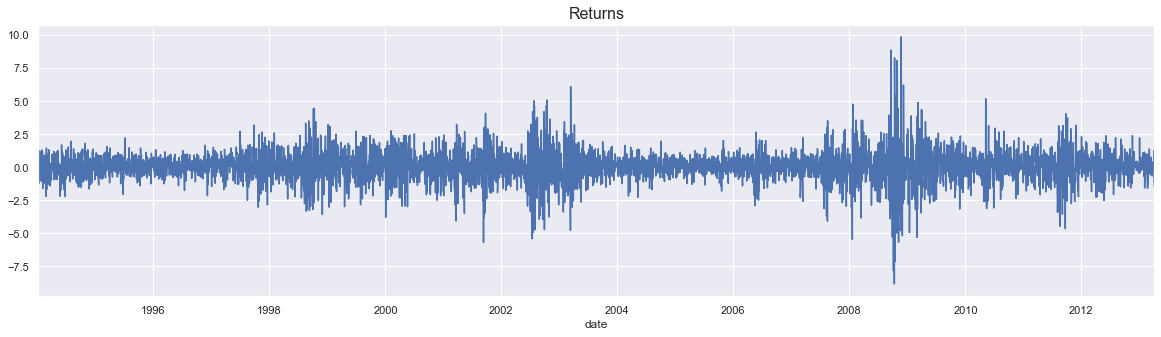

In [10]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 16)
plt.show()

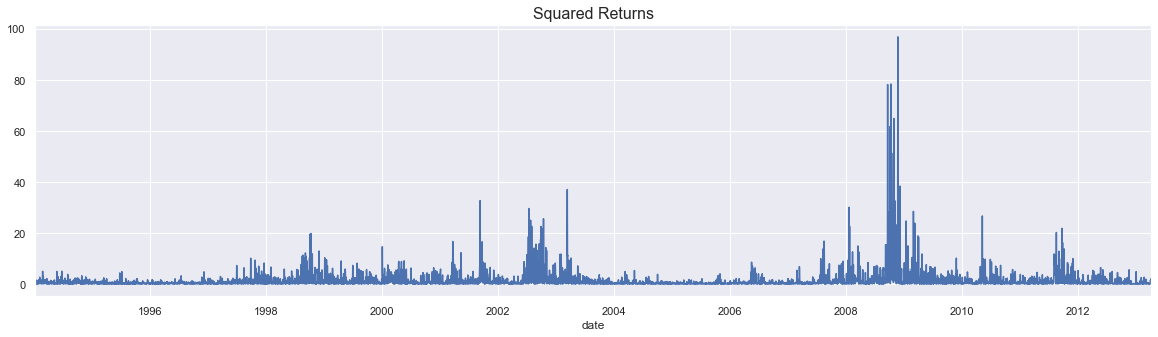

In [11]:
df.squared_returns.plot(figsize=(20, 5))
plt.title("Squared Returns", size=16)
plt.show()


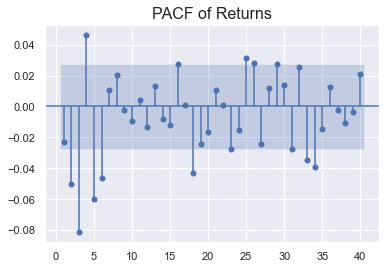

In [12]:
sgt.plot_pacf(df['returns'][1:], zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title("PACF of Returns", size=16)
plt.show()

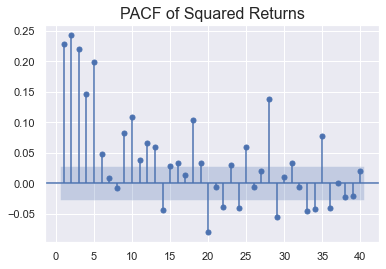

In [13]:
sgt.plot_pacf(df['squared_returns'][1:], zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title("PACF of Squared Returns", size=16)
plt.show()

We can see that the first six lags are significant with the first five yielding coefficients between 0.15 and 0.25, such high significant values of partial autocorrelation among the first few lags suggests that there tend to be short term trends invariance. Another way to think about this is clustering where we have periods of high variation, followed by
periods of high variations, as well as periods of low variation, followed by periods of low variation. This is exactly what the volatility characteristics stated earlier, so our data set makes perfect sense.

### The ARCH(N) Model 

In [16]:
# Let build minimal model and print out the summary

model_arch_1 = arch_model(df.returns[1:])
result_arch_1 = model_arch_1.fit()
result_arch_1.summary()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 10655466386.949347
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2307800712.2000313
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7009.029441983984
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7024.036598318771
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712846616298
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6975.418131451261
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7092.283599755619
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6973.879323398226
Iteration:      9,   Func. Count:     59,   Neg. LLF: 6970.08804564216
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478407529
Iteration:     11,   Func. Count:     69,   Neg. LLF: 6970.058367475871
Iteration:     12,   Func. Count:     74,   Neg. LLF: 6970.058366189876
Iteration:     13,   Func. Count:     78,   Neg. LLF: 6970.0583661891615
Optimization terminated successfully    (Exit mode 0)
        

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Tue, Aug 23 2022   Df Residuals:                     5016
Time:                        11:11:54   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

Lets look at the Constant Mean - GARCH Model Results. 

Let's begin with the mean model box, which states constant. This implies that the mean is constant rather than moving, as our previous experience with returns suggested. Below, we see the volatility model, which is labeled as GARCH instead of ARCH, this confirms that we are using a different type of model for the variance equation, we will discuss it.

Next up, we can notice normal written next to distributions. This expresses the distribution of the residuals. The method dictates how we find the coefficients, which is the maximum likelihood in this case as it ought to be. The date and time, of course, express when the feting happened. Another important focus is DF (degrees of freedom) of this model, which it showcases the number of coefficients we're trying to estimate.

**Iteration Output**

it takes several iterations before it converges. This, of course, is due to fitting two equations at the same time. 

*How it works !!*

It fits a model with certain coefficients, then checks how well it is performed afterwards. It adjusts the coefficients before making a secondary check and so on. This means the absolute values have to increase so that the program can stop


**Mean MOdel**

we see there is a single variable MEU and it's characteristics. This view is the same as the one we had in our initial equation, and since we saw this as a constant, mean model, we expect only a single constant coefficient to be determined for this equation. Furthermore, the large t value suggests significance of the coefficient, so we know the mean isn't zero.

**Volatility Model**


The Omega represents the constant value in the variance. It's what we labeled as alpha null when we introduced the equation. The $\alpha_1$, which is obviously the coefficient for the squared values right under it. We have $\beta_1$.

In [17]:
sim_model_arch_1 = arch_model(df.returns[1:], mean='Constant', vol="ARCH", p=1)
sim_result_arch_1 = sim_model_arch_1.fit()
sim_result_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 29071.830522657772
Iteration:      2,   Func. Count:     13,   Neg. LLF: 12040.742295031192
Iteration:      3,   Func. Count:     20,   Neg. LLF: 7809.722526011103
Iteration:      4,   Func. Count:     26,   Neg. LLF: 7660.088789374433
Iteration:      5,   Func. Count:     30,   Neg. LLF: 7660.08878204096
Iteration:      6,   Func. Count:     33,   Neg. LLF: 7660.088782040992
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7660.08878204096
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Tue, Aug 23 2022   Df Residuals:                     5017
Time:                        11:33:55   Df Model:                            3
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0345  1.603e-02      2.151  3.147e-02 [3.063e-03,6.590e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9206  4.309e-02     21.365 2.855e-101 [  0.836,  1.005]
alpha[1]       0.3684  5.040e-02      7.310  2.673e-13 [  0.270,  0.467]
========================================================================

Covariance estimator: robust
"""

We see that it took this model only six iterations to execute, this means the specifications were loose enough and Python managed to solve the regression in only six tries. This implies our model is light and doesn't take too long to compute. If we have a look at the right column, we'll see both the adjusted and unadjusted R squared values. First of all, there is no such thing as minus zero, the notation simply means that the value is negative, but its absolute value is very minute that we should round it down to zero, even up to the third digit after the decimal point. Second of all, we know that the R-squared is a measurement of explanatory variation away from the mean. So if we're assuming a constant mean, it makes little sense to expect this model to explain that deviation well. In other words, if the residuals are simply a version of the original data set where every value is decreased by a constant, then there will be no actual variance, and that results in a zero R squared value. we must remember that the R-squared is a useful measure, but not for arch models.

Moving on, we can see that the log likelihood is roughly -7660. If you compare this to the values we got for the AMA and Arima, you'll see that the arch value is higher than most. The LL measures the goodness of fit. Therefore, even the simplest arch model yields a better estimate than the complex multi Lag ARIMA model we referred to earlier.


From the degrees of freedom in the first table, we know that there should be three coefficients. These three are $C$, $\alpha_0$, and $\alpha_1$.

Now Lets look at he Mean Model. P-value is 0.03147, and and coefficient 0.0345.The $\mu$ coefficient is significant.

The volatility model, We see that both Omega and Alpha one are significant. Omega here represents the constant term of the variant equation, which we dubbed as $\alpha_0$. So we are estimating only three coefficients and all three turn out to be significant.


So the ARCH(1) instantly becomes the best estimate of the data we've seen so far.

**However, it is crucial to remember that the arch can only be used to predict future variants rather than future returns, thus we can use it to determine if we expect to see stability in the market, but not predict if the prices would go up or down.**

### Higher Lag ARCH method 

In [18]:
model_arch_2= arch_model(df.returns[1:], mean='Constant', vol="ARCH", p=2)
result_arch_2 = model_arch_2.fit()
result_arch_2.summary()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 34336.61062838968
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11809.810463437398
Iteration:      3,   Func. Count:     24,   Neg. LLF: 7900.582867042022
Iteration:      4,   Func. Count:     31,   Neg. LLF: 7647.101576187482
Iteration:      5,   Func. Count:     37,   Neg. LLF: 8810.02930517937
Iteration:      6,   Func. Count:     44,   Neg. LLF: 7449.551200592559
Iteration:      7,   Func. Count:     49,   Neg. LLF: 7449.545177538754
Iteration:      8,   Func. Count:     54,   Neg. LLF: 7449.545164098214
Iteration:      9,   Func. Count:     58,   Neg. LLF: 7449.545164098105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7449.545164098214
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Tue, Aug 23 2022   Df Residuals:                     5016
Time:                        13:10:05   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0484  1.401e-02      3.455  5.495e-04 [2.095e-02,7.585e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6978  3.564e-02     19.580  2.272e-85 [  0.628,  0.768]
alpha[1]       0.2202  3.474e-02      6.339  2.311e-10 [  0.152,  0.288]
alpha[2]       0.2783  3.645e-02      7.635  2.260e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""

In [19]:
model_arch_3= arch_model(df.returns[1:], mean='Constant', vol="ARCH", p=3)
result_arch_3 = model_arch_3.fit()
result_arch_3.summary()


Iteration:      1,   Func. Count:      7,   Neg. LLF: 39962.465851469606
Iteration:      2,   Func. Count:     18,   Neg. LLF: 11954.630689597143
Iteration:      3,   Func. Count:     27,   Neg. LLF: 8336.666751802351
Iteration:      4,   Func. Count:     34,   Neg. LLF: 7489.93945684613
Iteration:      5,   Func. Count:     41,   Neg. LLF: 7496.4079308108885
Iteration:      6,   Func. Count:     48,   Neg. LLF: 7393.754032519646
Iteration:      7,   Func. Count:     56,   Neg. LLF: 7301.714171954324
Iteration:      8,   Func. Count:     63,   Neg. LLF: 7277.050581173273
Iteration:      9,   Func. Count:     69,   Neg. LLF: 7277.050453151904
Iteration:     10,   Func. Count:     75,   Neg. LLF: 7277.050452148393
Iteration:     11,   Func. Count:     80,   Neg. LLF: 7277.0504521483745
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7277.050452148393
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations:

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -7277.05
Distribution:                  Normal   AIC:                           14564.1
Method:            Maximum Likelihood   BIC:                           14596.7
                                        No. Observations:                 5020
Date:                Tue, Aug 23 2022   Df Residuals:                     5015
Time:                        13:11:08   Df Model:                            5
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0529  1.316e-02      4.018  5.875e-05 [2.707e-02,7.865e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5012  2.834e-02     17.685  5.505e-70 [  0.446,  0.557]
alpha[1]       0.1570  2.649e-02      5.926  3.108e-09 [  0.105,  0.209]
alpha[2]       0.2197  2.588e-02      8.489  2.077e-17 [  0.169,  0.270]
alpha[3]       0.2804  3.354e-02      8.359  6.302e-17 [  0.215,  0.346]
========================================================================

Covariance estimator: robust
"""